## Traditional Similarity search methods

1. Jaccard = intersection(A,B) / union(A,B). For example, A = {1,2,3} and B = {2,4}, our resulkting Jaccard = 0.25
2. Levenshtein (similar to Jaccard but requires preprocessign for n-gram representation)

In [4]:
def jaccard(sentc_one: str, sentc_two: str):
    # Convert to sets
    sentc_one = set(sentc_one.split())
    sentc_two = set(sentc_two.split())
    # Calculate
    shared = sentc_one.intersection(sentc_two)
    union = sentc_one.union(sentc_two)
    return len(shared) / len(union)





In [12]:
jaccard('Paul is cool', 'Cool person forever Paul is coolest is coolest')

0.2857142857142857

## Sparse and Dense Representations

1. TF-IDF (Sparse)

Term Frequency = f(q, D) / f(t, D)

f(q, D) - Frequency of query q in Document D
f(t, D) - Frequency of all terms in Document D (total num terms)

Inverse Document Frequency or IDF = log (N / N(q='forest'))
It is calculate for each document

N is the total number of documents
N(q="forest") is number of documents containing the query forest

2. BM25 (Sparse)
3. SBERT (Dense)

In [18]:
a = "purple is the best city in the forest".split()
b = "there is an art to getting your way and throwing bananas on to the street is not it".split()
c = "it is not often you find soggy bananas on the street".split()


In [14]:
a

['purple', 'is', 'the', 'best', 'city', 'in', 'the', 'forest']

In [20]:
import numpy as np

# we'll merge all docs into a list of lists for easier calculation of IDF
docs = [a , b, c]
# print(docs)

def tfidf(word, sentence):
    # term frequency
    freq = sentence.count(word)
    tf = freq / len(sentence)
    
    # inverse document frequency
    idf = np.log10(len(docs) / sum([1 for doc in docs if word in doc]))

    # tf-idf
    tf_idf = round(tf*idf, 4)

    return tf_idf


In [22]:
tfidf('forest', a)

0.0596

In [23]:
# Create Document vectors
vocab = set(a+b+c)
vocab

{'an',
 'and',
 'art',
 'bananas',
 'best',
 'city',
 'find',
 'forest',
 'getting',
 'in',
 'is',
 'it',
 'not',
 'often',
 'on',
 'purple',
 'soggy',
 'street',
 'the',
 'there',
 'throwing',
 'to',
 'way',
 'you',
 'your'}

In [25]:
# Mirror our vocab as vector, for each document

vec_a = []
vec_b = []
vec_c = []

for word in vocab:
    vec_a.append(tfidf(word, a))
    vec_b.append(tfidf(word, b))
    vec_c.append(tfidf(word, c))


In [26]:
vec_b

[0.0,
 0.0265,
 0.0265,
 0.053,
 0.0098,
 0.0,
 0.0265,
 0.0,
 0.0265,
 0.0,
 0.0265,
 0.0098,
 0.0,
 0.0,
 0.0098,
 0.0,
 0.0098,
 0.0,
 0.0098,
 0.0265,
 0.0,
 0.0,
 0.0,
 0.0265,
 0.0265]

## BM25
BM25 is an optimized version of TFIDF

One of the problems with the TFIDF method is that as the frequency of queries found in a document increase, the score increases linearly.

Imagine 1000 word article with word dog appearing 10 times = good chance article is talking about dog

Now if you double words that mention dog to 20, TFIDF will double as well. 

Logically that shouldnt be the case. That means that the original document with dog 10times is a document that is half as relevant to dogs as the article with dog 20 times. BM25 tries to normalize this exaggeration. 

In [3]:
a = "purple is the best city in the forest".split()
b = "there is an art to getting your way and throwing bananas on to the street is not it".split()
c = "it is not often you find soggy bananas on the street".split()
d = "green should have smelled more tranquil but somehow it just tasted rotten".split()
e = "joyce enjoyed eating pancakes with ketchup".split()
f = "as the asteroid hurtled toward earth becky was upset her dentist appointment had been canceled".split()

In [5]:
import numpy as np

docs = [a, b, c, d, e, f]
N = len(docs) # Number of documents

# Recall tfidf
def tfidf(word, sentence):
    # term frequency
    freq = sentence.count(word)
    tf = freq / len(sentence)
    
    # inverse document frequency
    N_q = sum([1 for doc in docs if word in doc]) # Number of docs that contain the word  
    idf = np.log10(N / N_q)

    # tf-idf
    tf_idf = round(tf*idf, 4)

    return tf_idf



In [6]:
# Optimization new features
# 1. Average Document length (Sum of All len(sent) across docs / N)
avgdl = sum(len(sentence) for sentence in docs) / N 

# 2. k and b - Adjustable parameters that control ...


In [7]:
N = len(docs) # Number of documents
#bm25 implementation
def bm25(word, sentence, k=1.2, b=0.75):
    # term frequency
    freq = sentence.count(word) 
    
    tf = (freq * (k + 1)) / (freq + k * (1 - b + b * len(sentence) / avgdl))

    # inverse document frequency
    N_q = sum([1 for doc in docs if word in doc]) # Number of docs that contain the word    
    idf = np.log(((N - N_q + 0.5) / (N_q + 0.5)) + 1)

    return round(tf*idf, 4)
    

In [9]:
bm25('purple', a)

1.7677

### Comparing TF-IDF and BM25 algorithms
The TF-IDF score increases linearly with the frequency for the matching term 

The BM25 algorithm increases logarithmically.

In most cases BM25 is more realistic.

## (Dense vectors): Sentence embeddings with Siamese BERT-Networks (SBERT)
The effect of using dense vectors is that it lets you represent words in a more meaningful manner

For example words like hi == hello in their vector similarity, and so would days of the week.

In this case, we have a transformer model (BERT) and our queries (q) and documents (D) are processed by many (and the same) BERT encoding layers (encoder network). Consequently, what we get as output are Dense vectors.

Similarity between query and Document can be calculated using cosine similarity. The smaller angle between 2 vectors. Where the angle is smaller they are more similar, where the angle is larger they are dissimilar.

We will use a SentenceTransformers library that uses Hugging Face Transformers under the hood. 

In [14]:
a = "purple is the best city in the forest"
b = "there is an art to getting your way and throwing bananas on to the street is not it"
c = "it is not often you find soggy bananas on the street"
d = "green should have smelled more tranquil but somehow it just tasted rotten"
e = "joyce enjoyed eating pancakes with ketchup"
f = "as the asteroid hurtled toward earth becky was upset her dentist appointment had been canceled"
g = "to get your way you must not bombard the road with yellow fruit"

In [15]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens') # sentence bert

sentence_embeddings = model.encode([a, b, c, d, e, f, g])

Downloading: 100%|██████████| 391/391 [00:00<?, ?B/s] 
Downloading: 100%|██████████| 3.95k/3.95k [00:00<?, ?B/s]
Downloading: 100%|██████████| 2.00/2.00 [00:00<00:00, 2.09kB/s]
Downloading: 100%|██████████| 229/229 [00:00<00:00, 237kB/s]
Downloading: 100%|██████████| 438M/438M [00:18<00:00, 24.3MB/s] 
Downloading: 100%|██████████| 53.0/53.0 [00:00<00:00, 26.6kB/s]
Downloading: 100%|██████████| 112/112 [00:00<00:00, 117kB/s]
Downloading: 100%|██████████| 466k/466k [00:00<00:00, 2.76MB/s]
Downloading: 100%|██████████| 399/399 [00:00<?, ?B/s] 
Downloading: 100%|██████████| 232k/232k [00:00<00:00, 561kB/s] 
Downloading: 100%|██████████| 190/190 [00:00<00:00, 191kB/s]


In [23]:
sentence_embeddings.shape # (7, 768) == (row, col), where col is the size of a single embedding vector
sentence_embeddings

array([[-0.6473692 , -0.22722252,  0.2818377 , ...,  0.19777124,
         0.44347912,  0.07920003],
       [ 0.68627053, -0.06007962, -0.21887724, ...,  0.7335471 ,
        -0.5783968 ,  0.1051655 ],
       [ 0.31879255, -0.5651987 , -0.13997136, ...,  1.3114421 ,
        -0.21025229, -0.6065187 ],
       ...,
       [-0.8976574 ,  0.53626764, -0.4212417 , ...,  0.12172866,
         0.6893288 , -0.06992121],
       [-0.29061842,  0.6061146 ,  0.72860605, ..., -0.2978694 ,
         0.04175397,  0.03440014],
       [ 0.41729304,  0.5861802 ,  0.66570663, ...,  0.45571277,
        -1.4096198 , -0.03274487]], dtype=float32)

In [29]:
N = sentence_embeddings.shape[0] # num of docs

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# calculate similarity scores (will store results in array)

scores = np.zeros((N, N)) # np array of N by N because we want to evaluate each document with one another
for i in range(N):
    scores[i, :] = cosine_similarity([sentence_embeddings[i]], sentence_embeddings)[0]

In [33]:
scores

array([[ 1.00000012,  0.18692766,  0.28297698,  0.29628253,  0.27451009,
         0.1017627 ,  0.21696275],
       [ 0.18692766,  1.00000024,  0.72058785,  0.5142895 ,  0.11749656,
         0.19306955,  0.66182357],
       [ 0.28297698,  0.72058785,  1.00000012,  0.48864433,  0.23568957,
         0.17157137,  0.5599308 ],
       [ 0.29628253,  0.5142895 ,  0.48864433,  0.99999976,  0.26985496,
         0.37889445,  0.52388823],
       [ 0.27451009,  0.11749656,  0.23568954,  0.26985502,  0.99999994,
         0.23422134, -0.01599771],
       [ 0.10176267,  0.19306955,  0.1715714 ,  0.37889433,  0.23422134,
         1.00000024,  0.22319689],
       [ 0.21696275,  0.66182351,  0.5599308 ,  0.52388823, -0.01599771,
         0.22319694,  0.99999994]])

<AxesSubplot:>

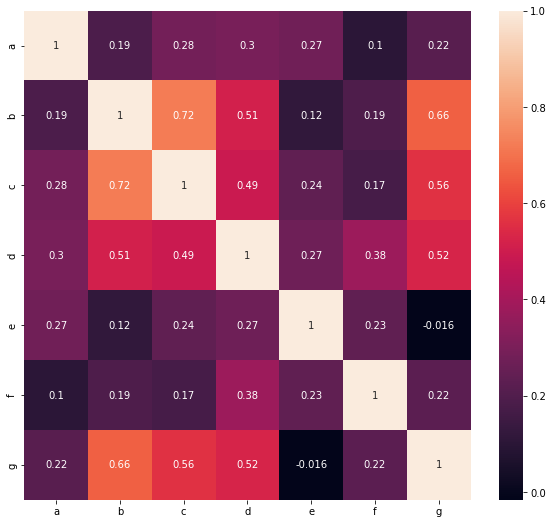

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,9))
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
sns.heatmap(scores, xticklabels=labels, yticklabels=labels, annot=True)

# Facebook AI Similarity Search (FAISS)

Library from Facebook AI allows users to compare vectors with high efficiency.

Building sentence and comparing sentence embeddings with python loops as above is slow. Feasible for ~ 100 vectors. 

FAISS can scale to billions of vectors. 



